# Plan

#### 1- Importation des bibliothèques


#### 2- Prétraitement des données


#### 3- Exploration des données


#### 4- Division des données


#### 5- Entraînement du modèle

- Random forest
- Logistic regression
- Neural network


#### 6- Évaluation du modèle

- Précision
- Score F1
- Rappel
- Matrice de confusion


#### 7- Comparaison des modèles




## Importation des bibliothèques 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import joblib


from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# les modèles de Machine learning 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier 
# Évaluation des modèles d'apprentissage automatique 
from sklearn.metrics import accuracy_score ,f1_score , precision_score ,recall_score,roc_curve ,auc ,confusion_matrix



In [12]:
df=pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX (2).csv")

## Prétraitement des données 

In [13]:
#Supprimer les espaces avant les noms des colonnes 
df.columns=df.columns.str.strip()

In [14]:
# Valeurs uniques dans la colonne  Label
df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

In [15]:
df.head(4)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [16]:

pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX (2).csv").head(200).to_csv("extrait.csv", index=False)


In [17]:
#Afficher le nombre des valeurs manquantes pour chaque colonne
print(df.isnull().sum())

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      1
Idle Std                       1
Idle Max                       1
Idle Min                       1
Label                          1
Length: 79, dtype: int64


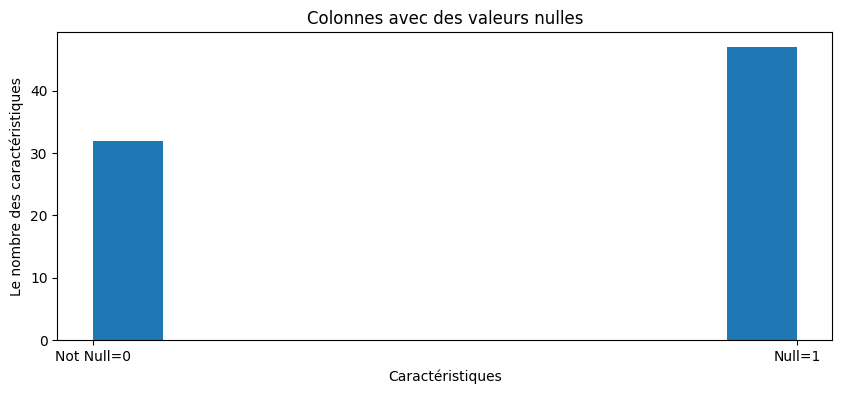

In [18]:
#vérification des valeurs nulles dans le jeu de données
plt.figure(1,figsize=(10,4))
plt.hist(df.isnull().sum())
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Colonnes avec des valeurs nulles')
plt.xlabel('Caractéristiques')
plt.ylabel('Le nombre des caractéristiques')
plt.show()

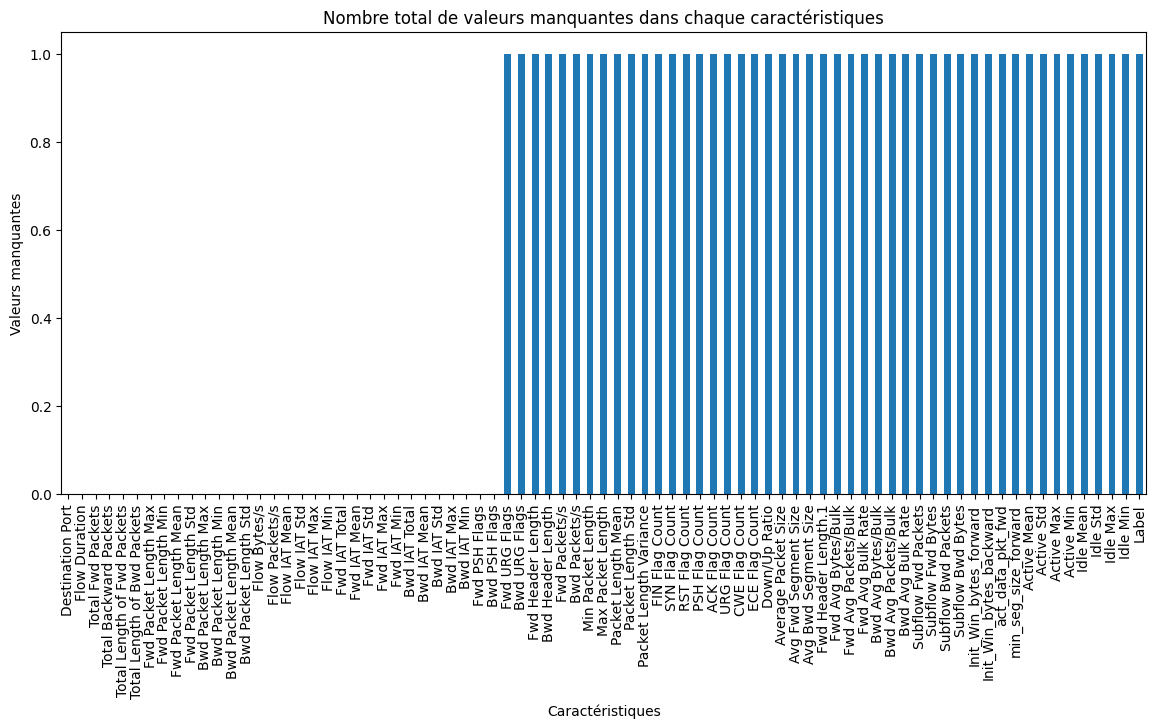

In [19]:
def traceValeursManquantes(dataframe):
    valeurs_manquantes=dataframe.isnull().sum()
    fig=plt.figure(figsize=(14,6))
    valeurs_manquantes.plot(kind='bar')
    plt.xlabel("Caractéristiques")
    plt.ylabel("Valeurs manquantes")
    plt.title("Nombre total de valeurs manquantes dans chaque caractéristiques")
    plt.show()
    
traceValeursManquantes(df)    

In [20]:
## Suppression des valeurs nulles 
Data_final=df.dropna()

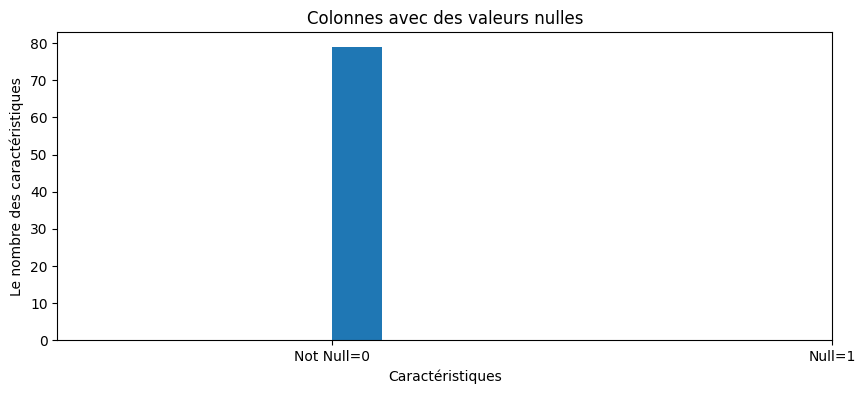

In [21]:
#vérification des valeurs nulles dans le jeu de données
plt.figure(1,figsize=(10,4))
plt.hist(Data_final.isnull().sum())
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Colonnes avec des valeurs nulles')
plt.xlabel('Caractéristiques')
plt.ylabel('Le nombre des caractéristiques')

plt.show()


In [22]:
# Convertir les inf en NaN  
Data_final.replace([np.inf, -np.inf], np.nan, inplace=True)  

# Vérifier les valeurs nulles  
null_values = Data_final.isnull().sum() 
print(null_values)

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64


C:\Users\ttaaz\AppData\Local\Temp\ipykernel_20532\717610083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_final.replace([np.inf, -np.inf], np.nan, inplace=True)


In [23]:
print(Data_final['Label'].unique())  # Vérifier les valeurs uniques
print(Data_final['Label'].value_counts())  # Vérifier le nombre d'occurrences par classe

['BENIGN' 'DDoS']
Label
DDoS      34952
BENIGN    31284
Name: count, dtype: int64


In [24]:
#pour connaître les types de données de chaque colonnes 
(Data_final.dtypes=='object')



Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                           True
Length: 79, dtype: bool

In [25]:
Data_final = Data_final.copy()
Data_final['Label']=Data_final['Label'].map({'BENIGN':0,'DDoS':1})
print(Data_final['Label'].unique())

[0 1]


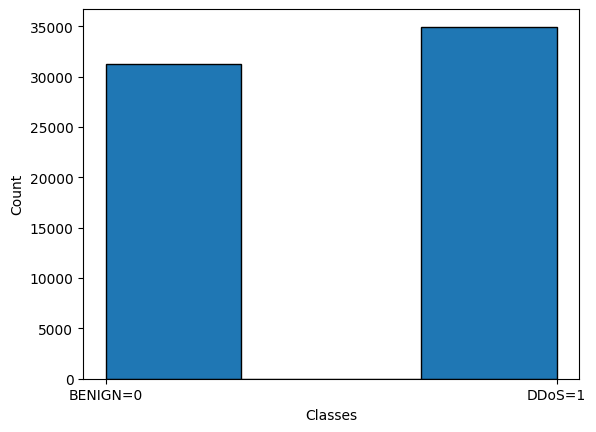

In [26]:

plt.hist(Data_final['Label'], bins=[0,0.3,0.7,1], edgecolor='black')  
plt.xticks([0,1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

 ## Exploration des données

In [27]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,66237.000000,...,66236.000000,66236.000000,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04
mean,6454.605553,1.388736e+07,5.180262,5.119223,695.622567,6.716837e+03,351.442064,23.465797,110.715335,135.438642,...,3.447793,22.101455,1.585840e+05,2.020972e+04,1.949634e+05,1.470892e+05,8.153964e+06,2.602819e+06,9.997795e+06,6.297389e+06
std,16710.894455,2.815843e+07,16.873659,23.797124,3230.046907,4.222698e+04,1435.510506,136.608403,400.376692,613.421563,...,13.108006,4.844533,8.489147e+05,3.050515e+05,1.028144e+06,8.214214e+05,1.804617e+07,9.841559e+06,2.187645e+07,1.642701e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.995600e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,9.949050e+05,3.000000,4.000000,30.000000,2.020000e+02,20.000000,0.000000,8.666667,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,7.639831e+06,5.000000,5.000000,64.000000,1.160100e+04,38.000000,6.000000,35.000000,10.263203,...,4.000000,20.000000,1.005000e+03,0.000000e+00,1.005000e+03,1.005000e+03,7.410306e+06,0.000000e+00,7.415575e+06,6.526832e+06
max,61538.000000,1.199983e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1680.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


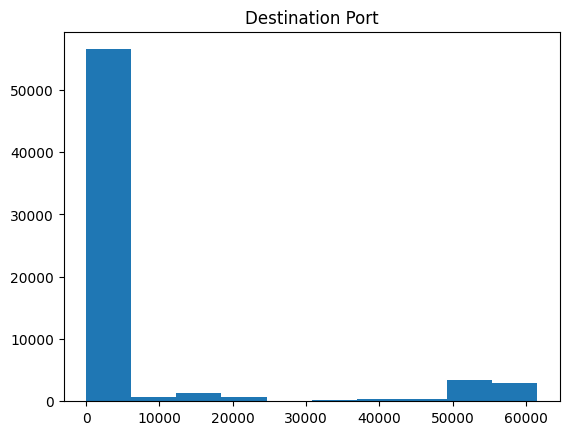

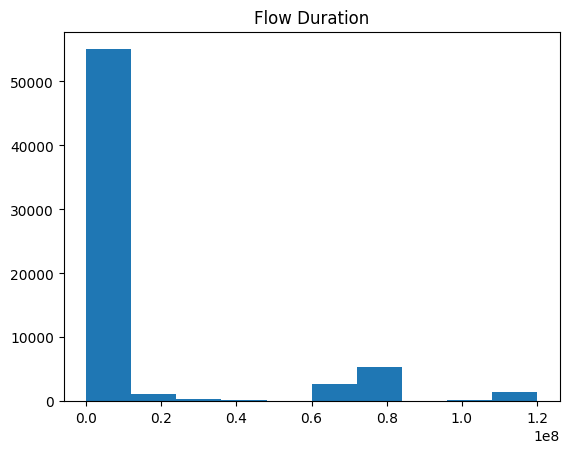

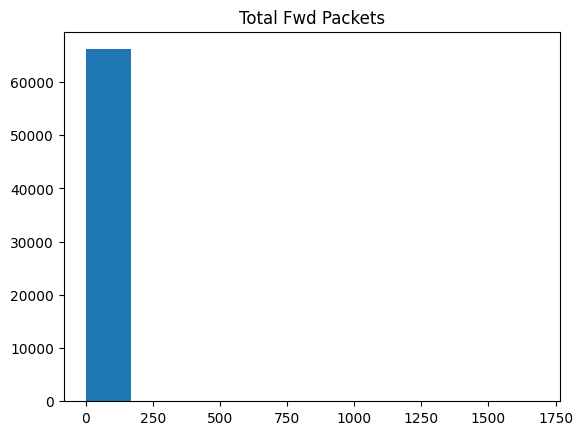

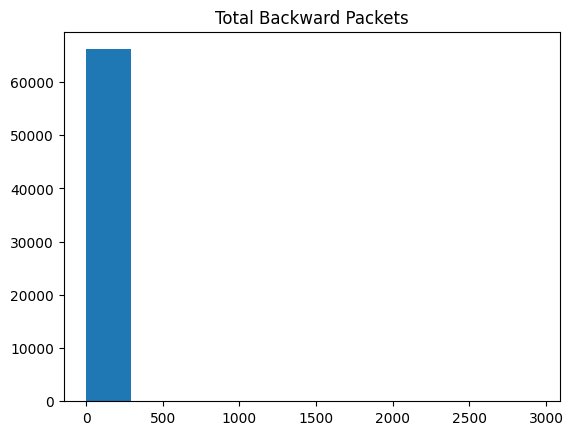

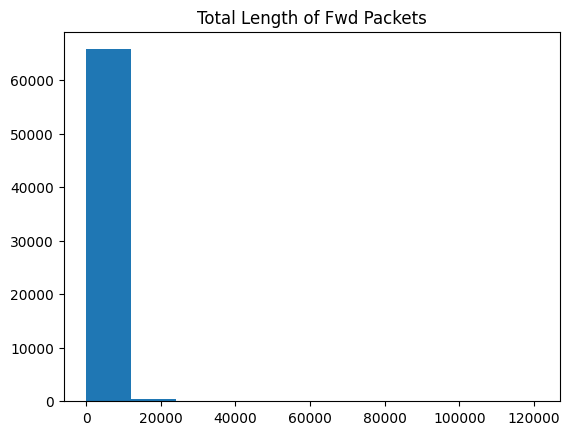

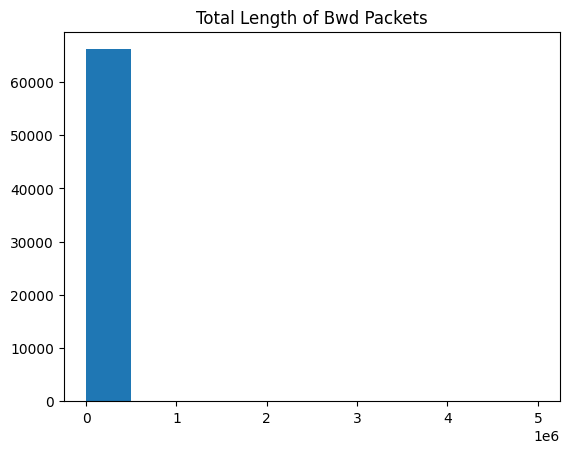

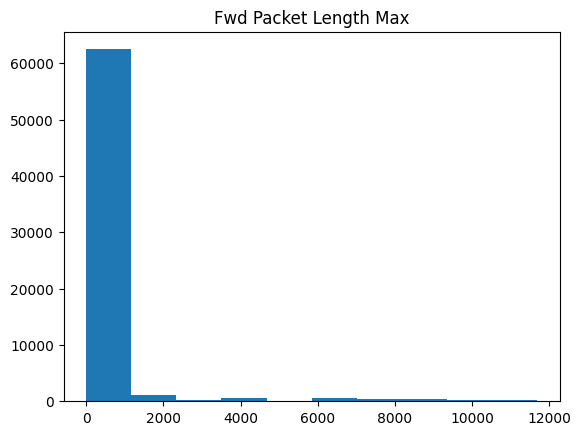

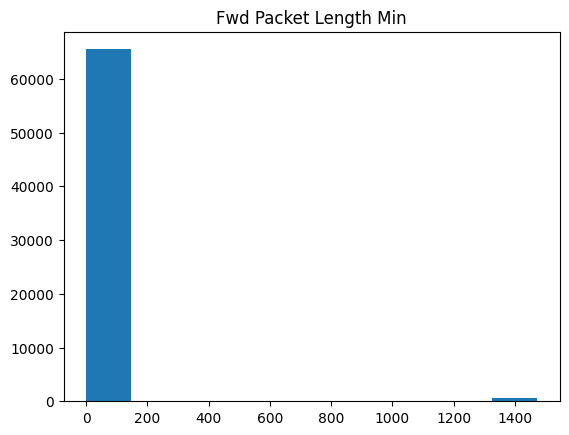

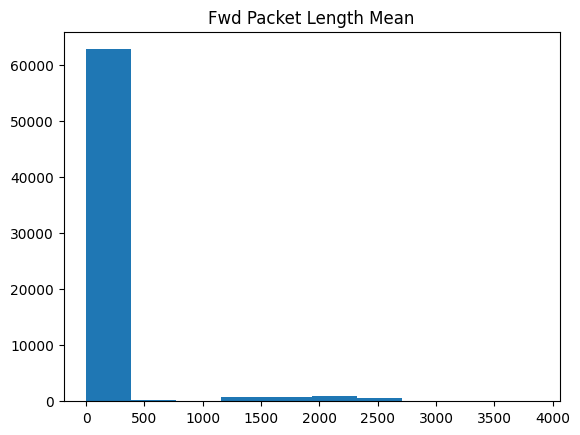

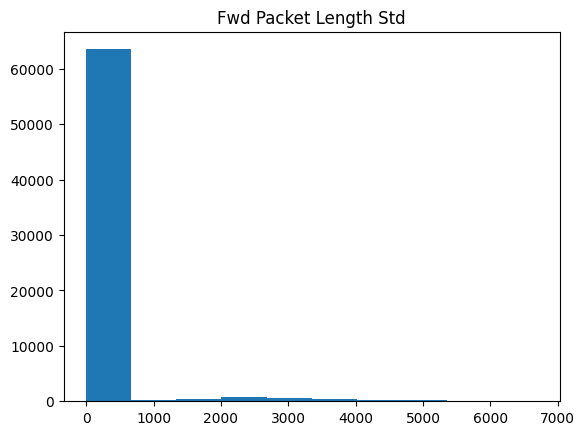

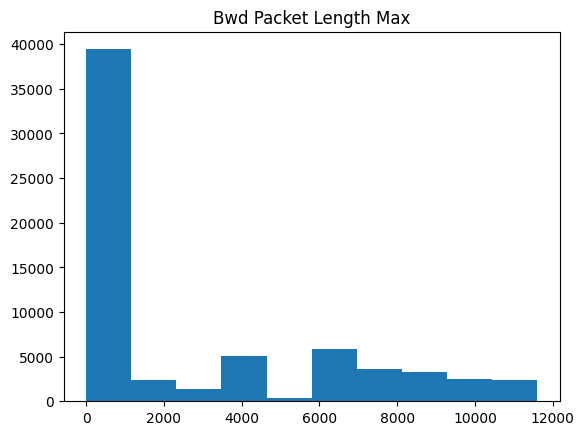

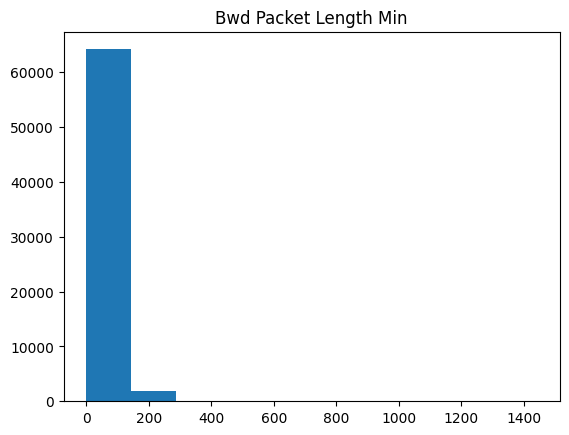

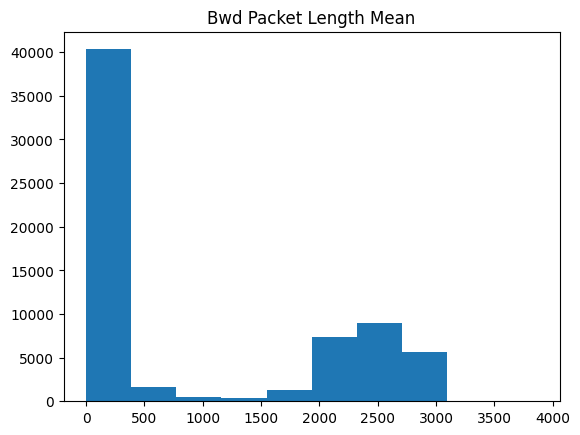

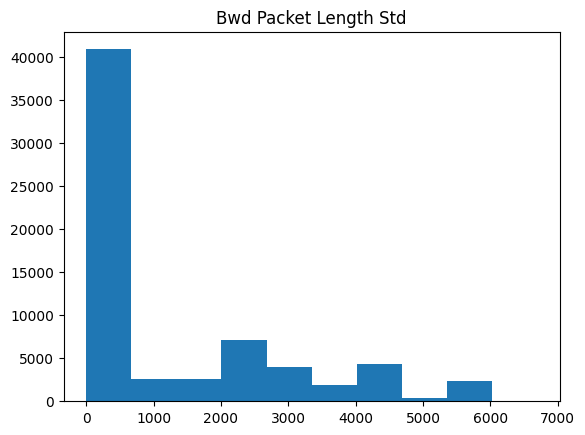

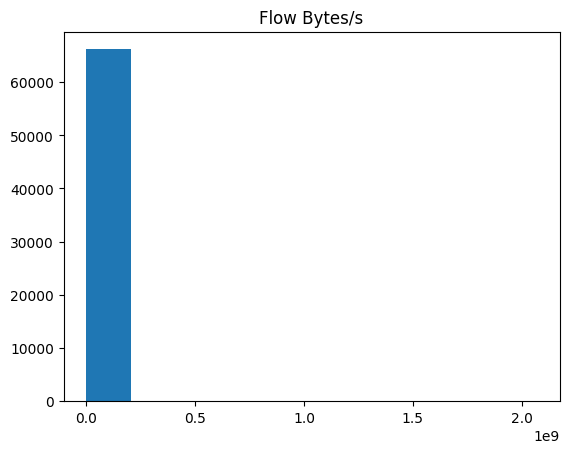

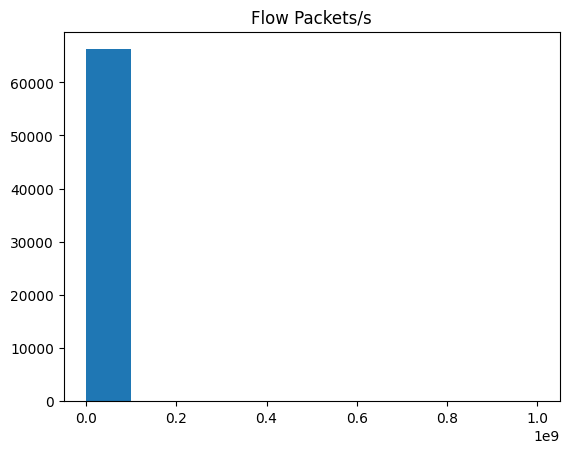

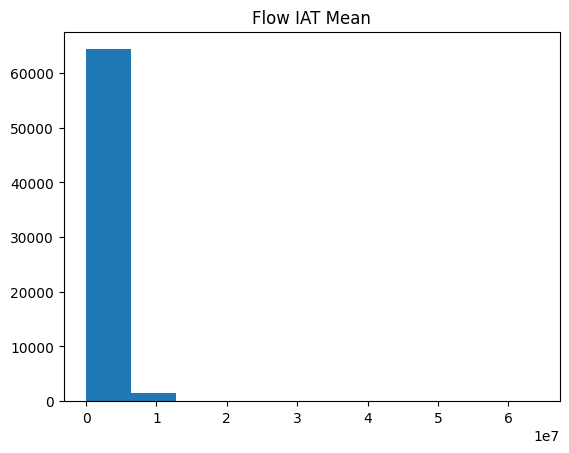

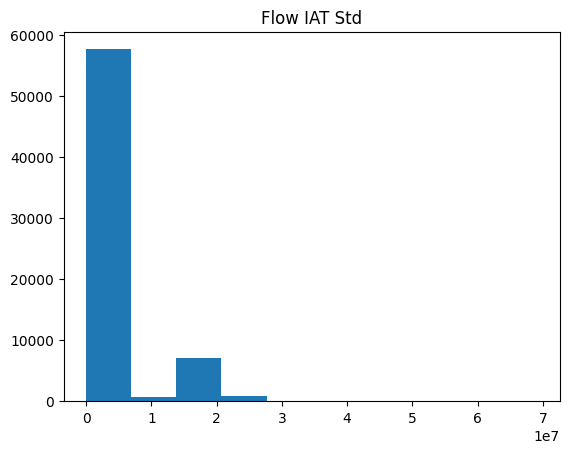

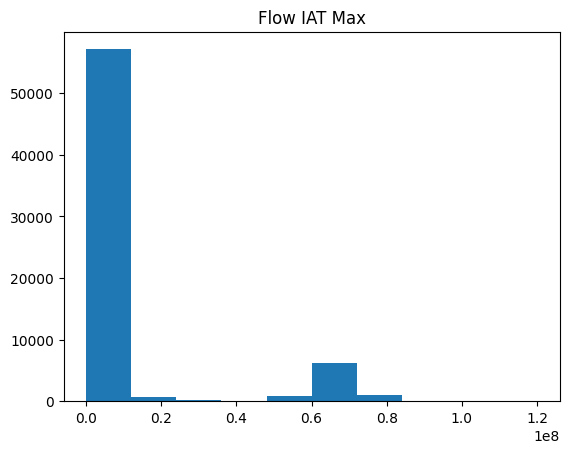

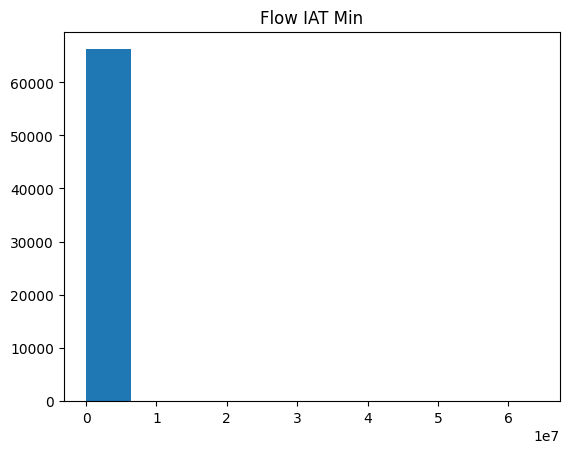

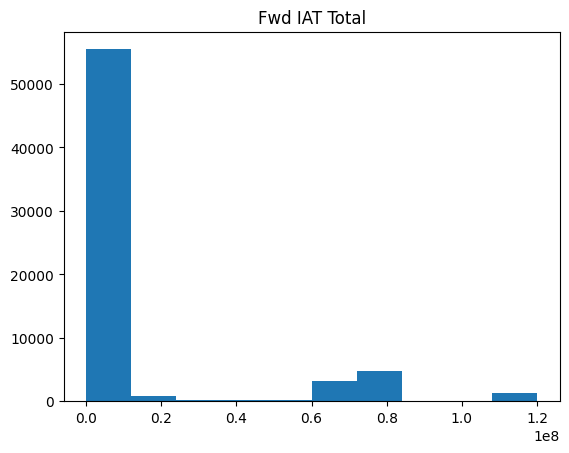

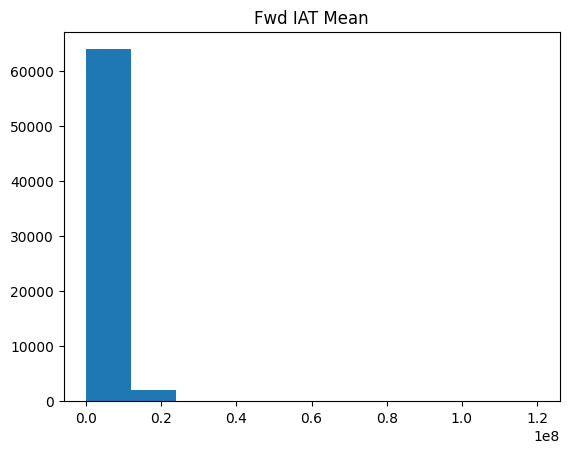

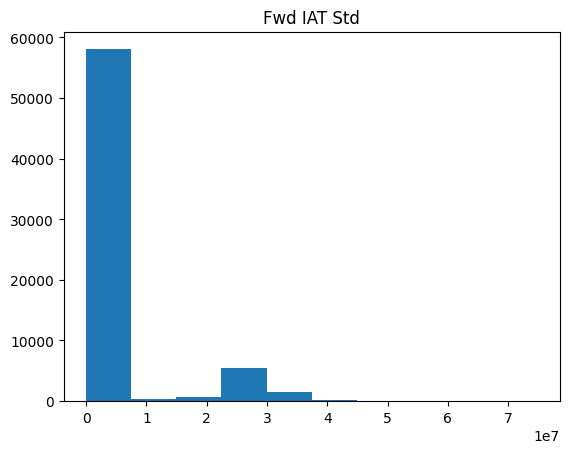

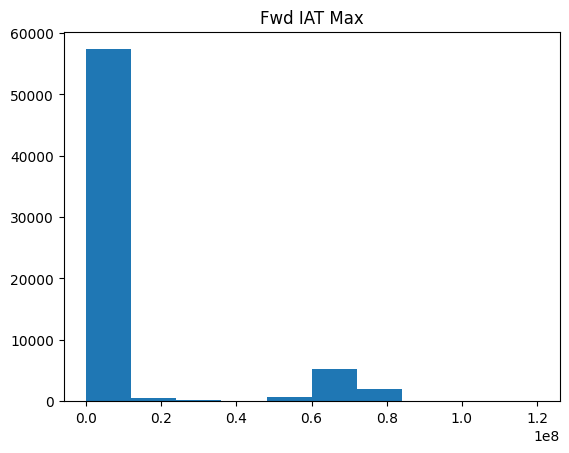

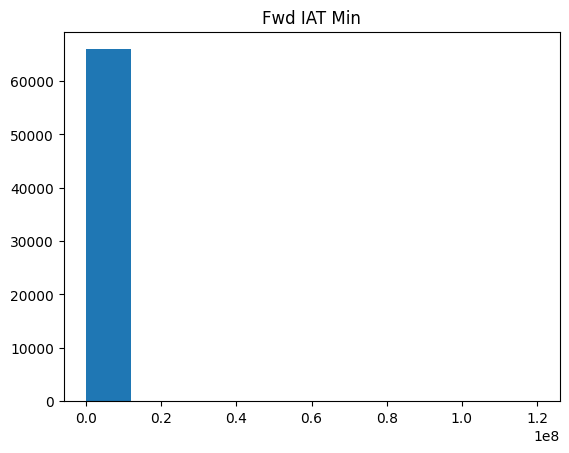

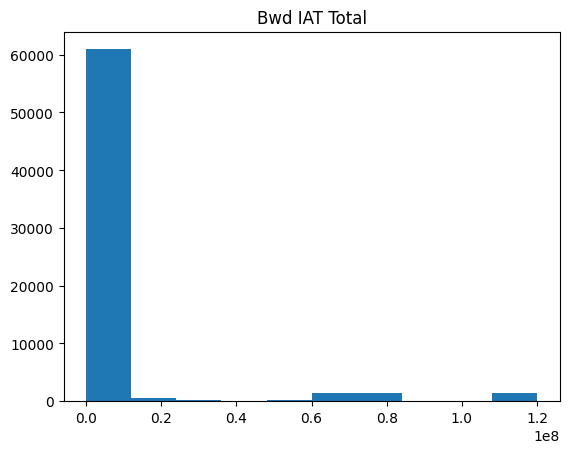

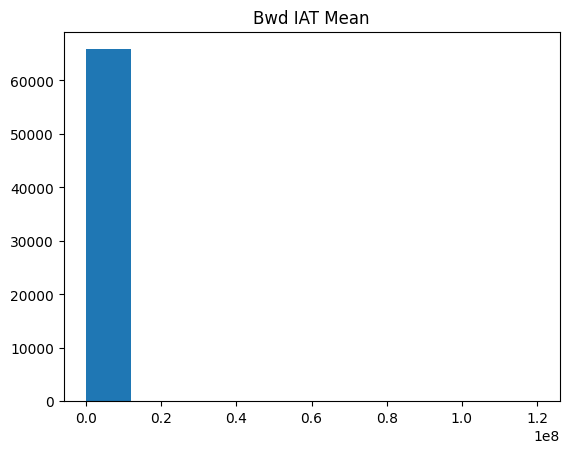

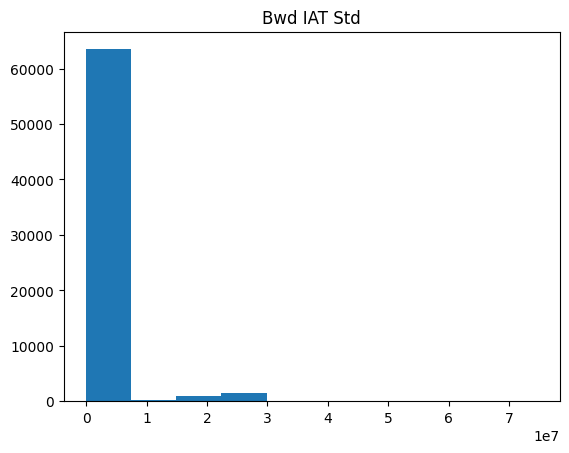

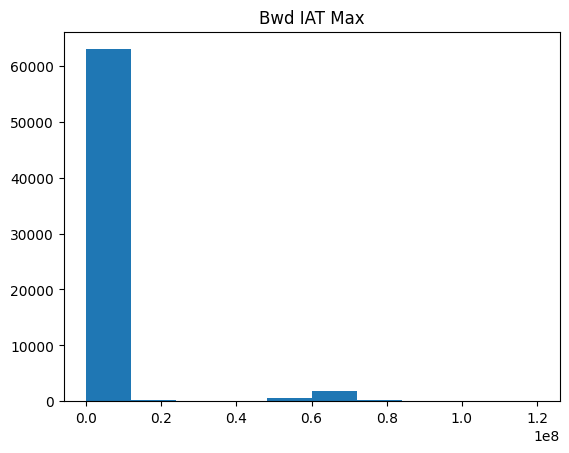

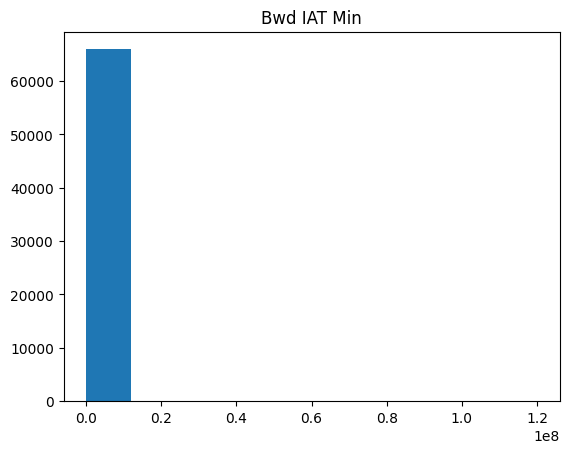

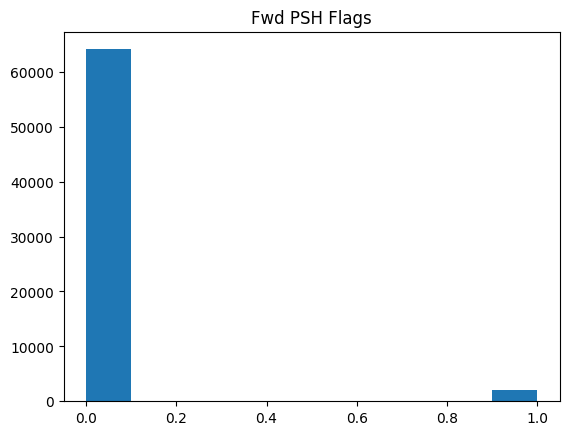

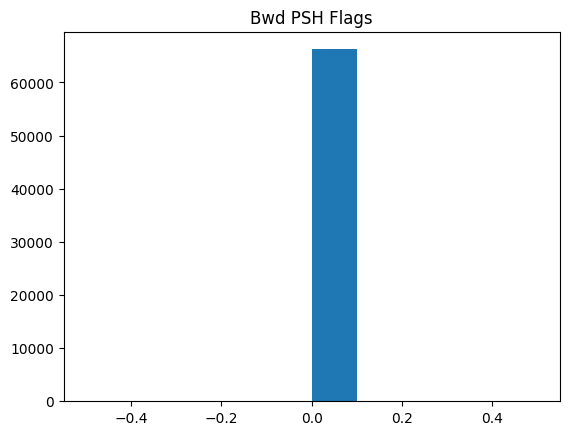

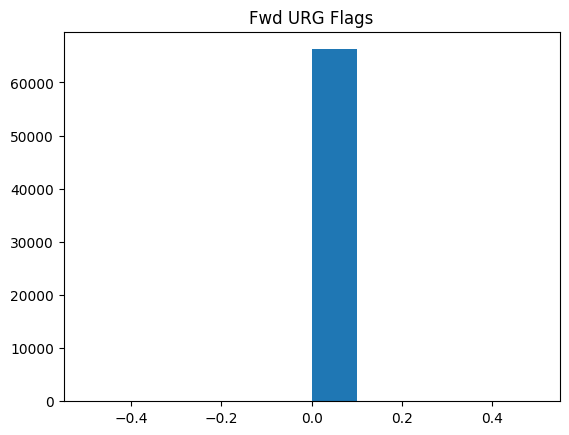

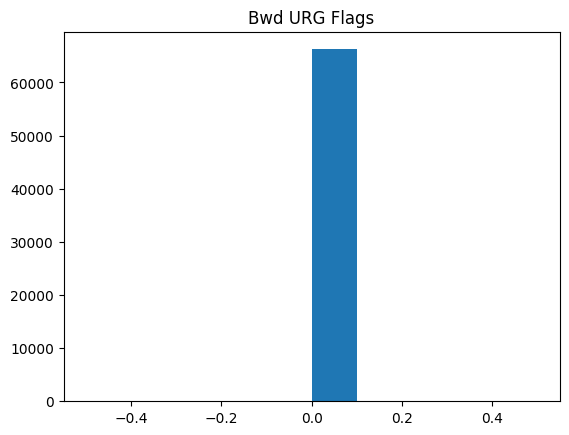

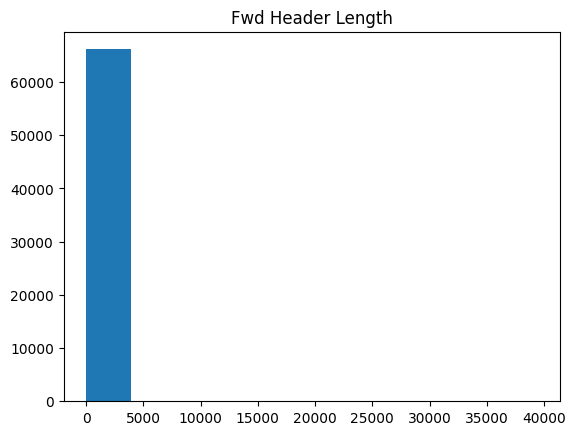

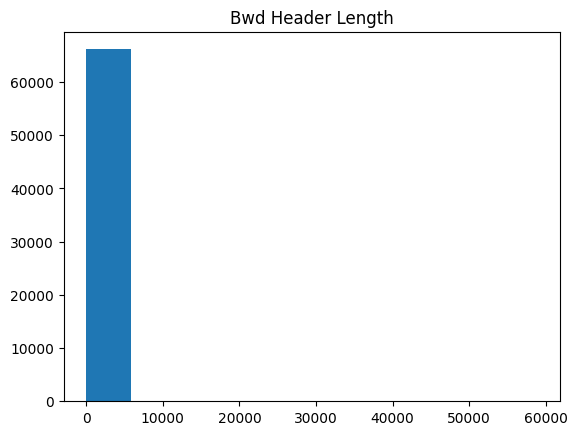

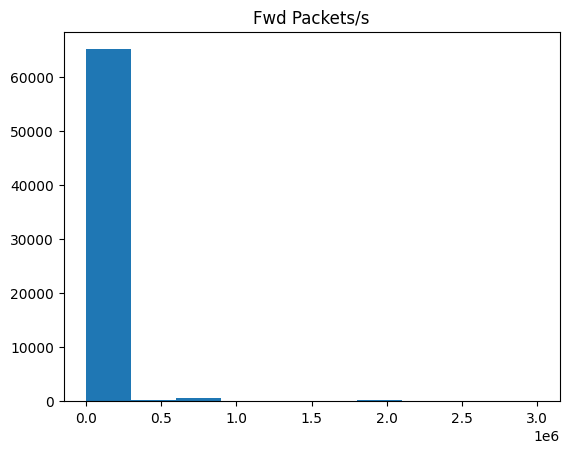

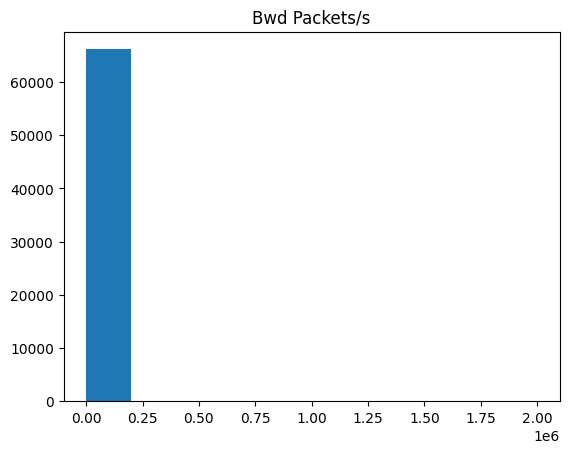

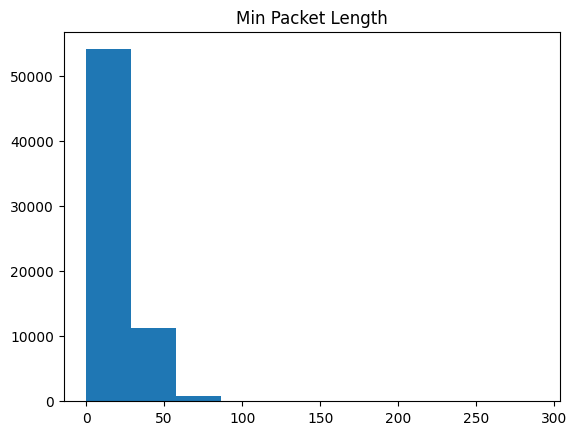

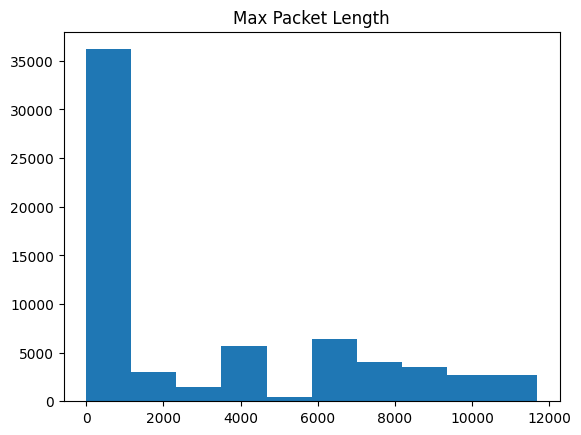

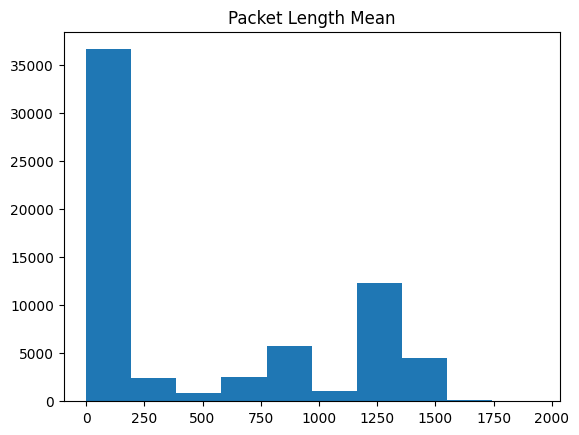

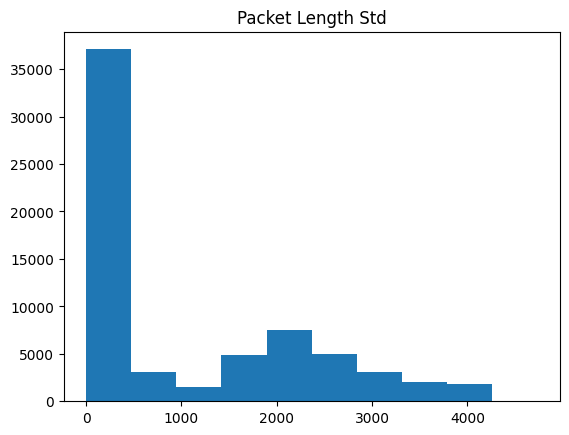

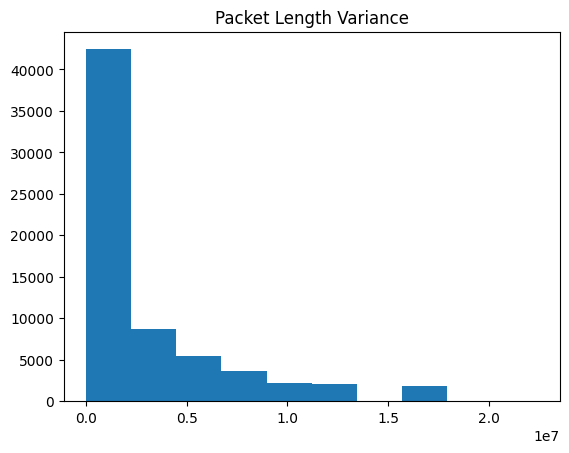

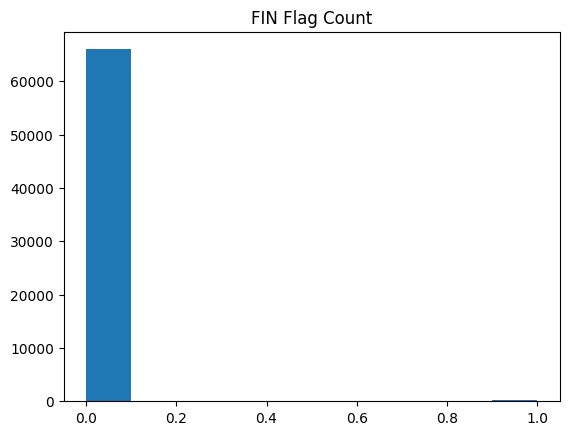

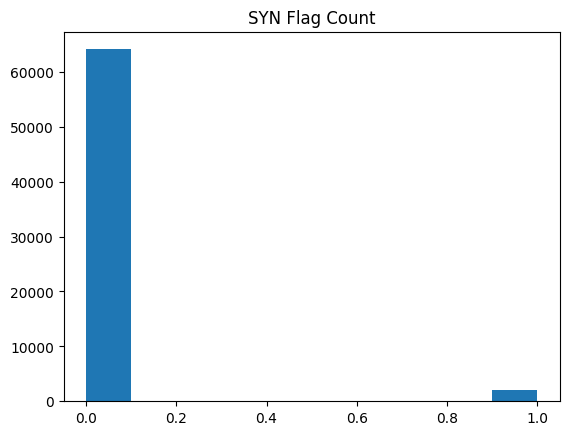

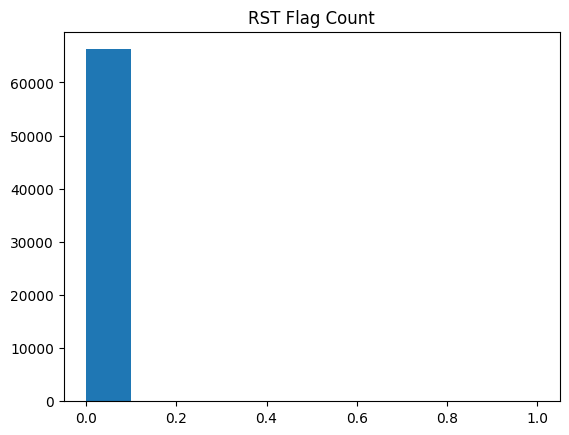

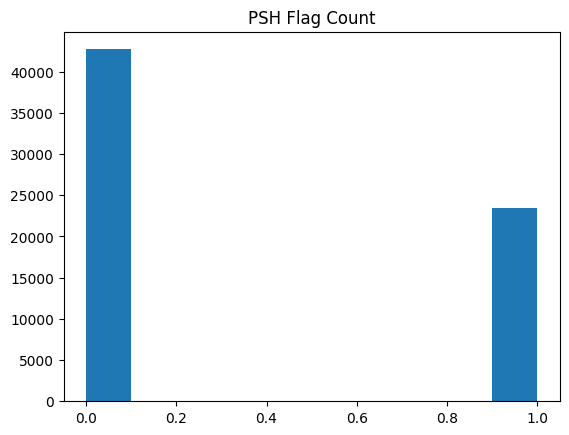

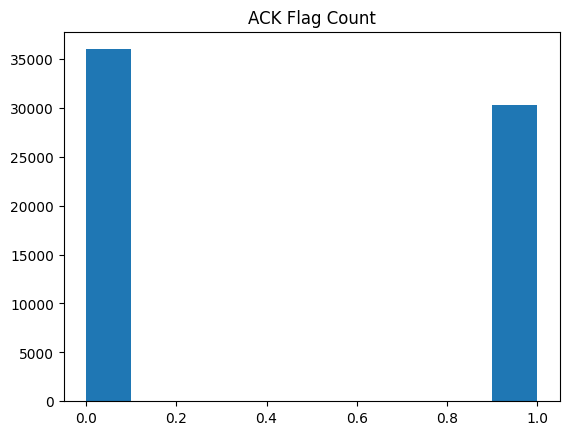

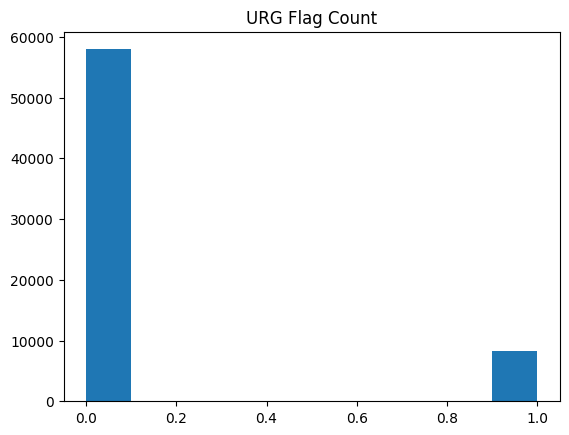

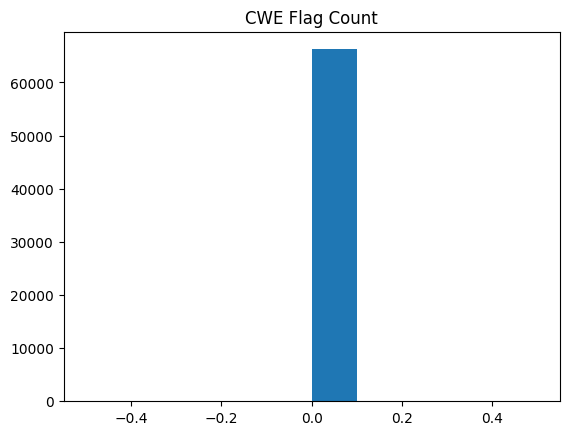

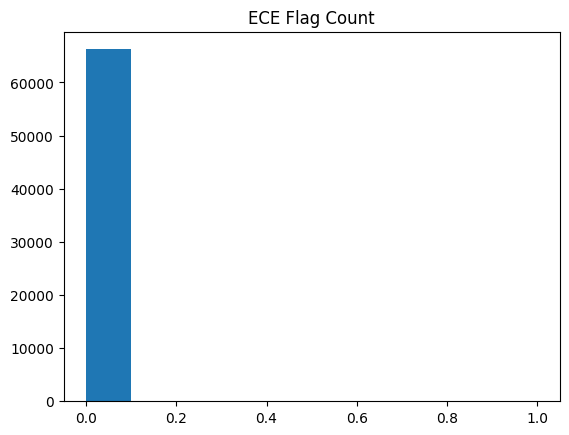

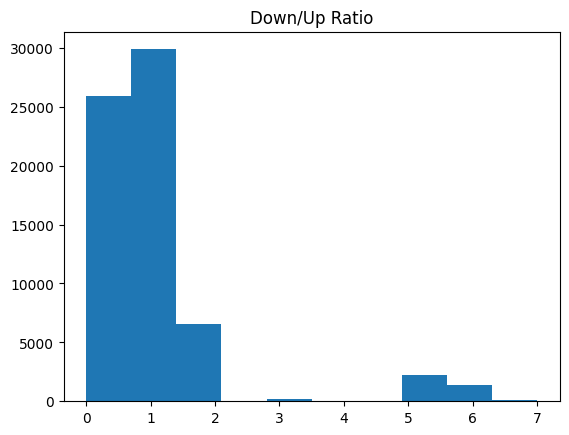

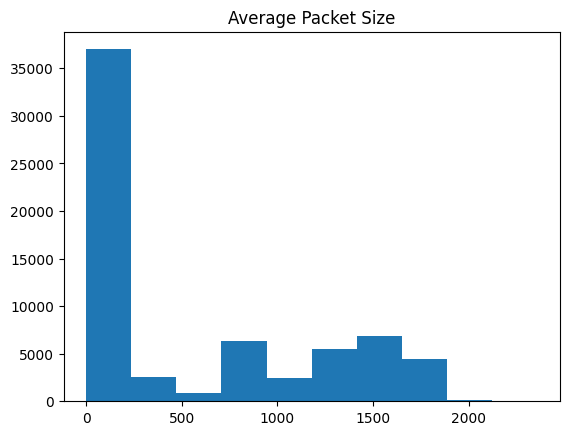

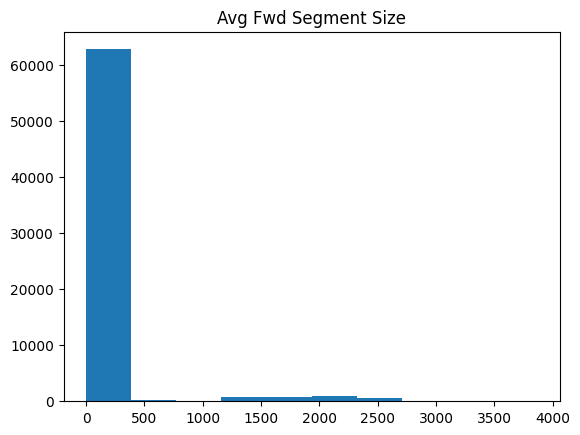

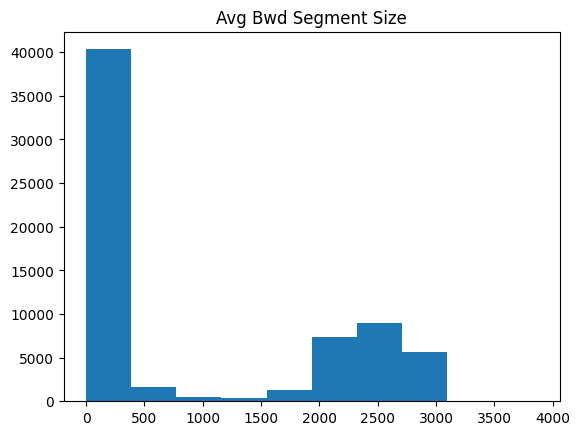

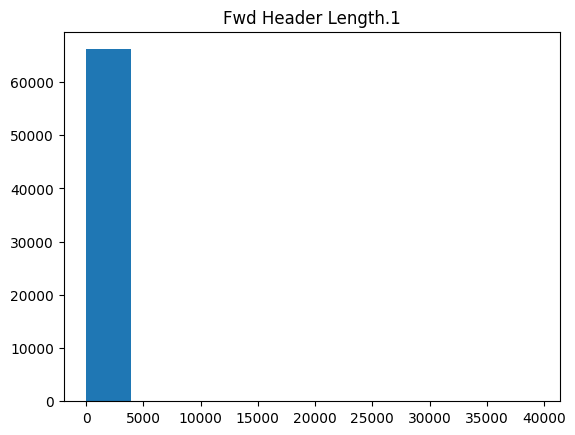

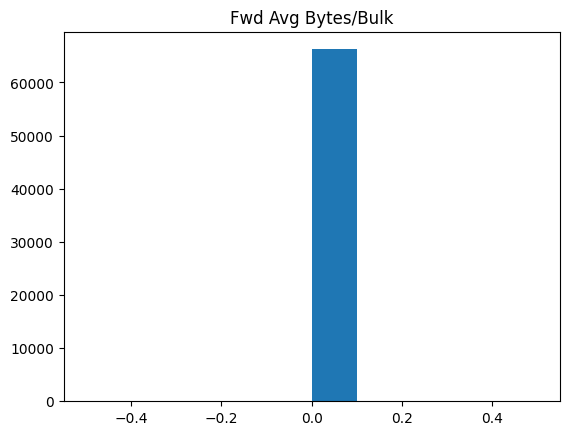

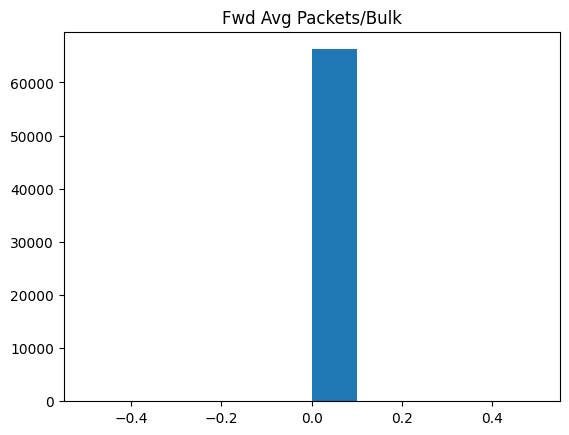

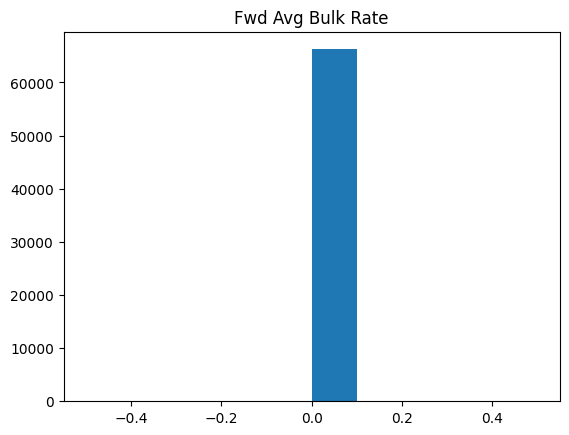

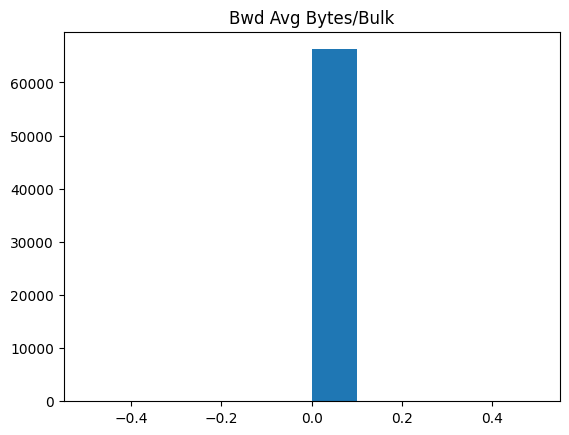

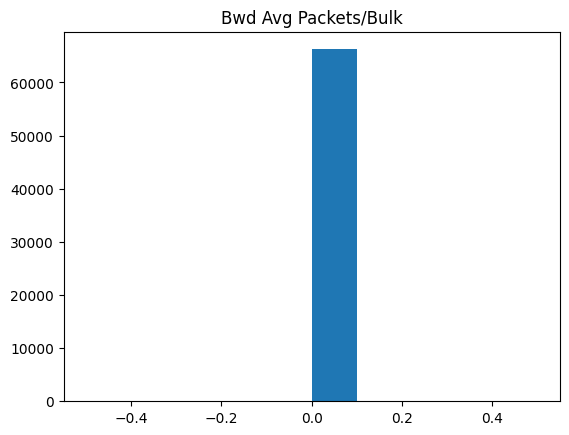

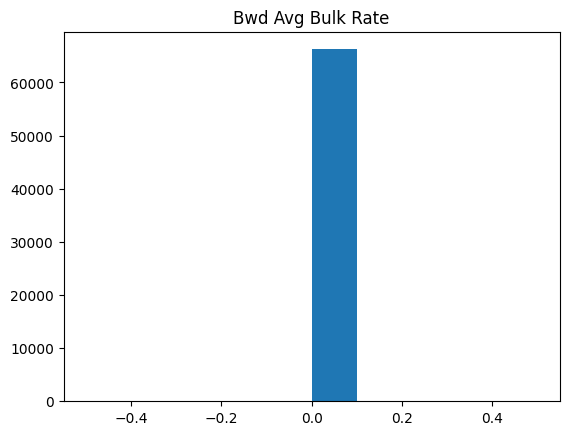

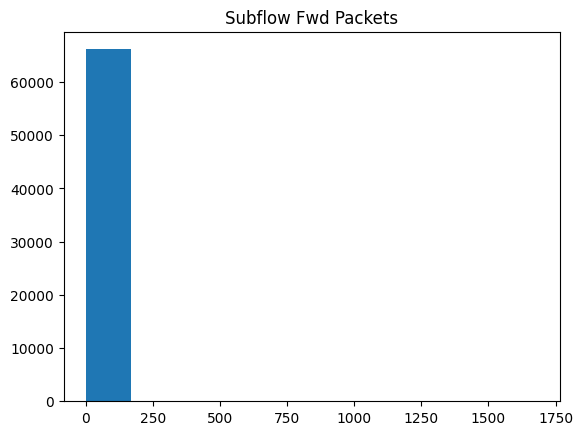

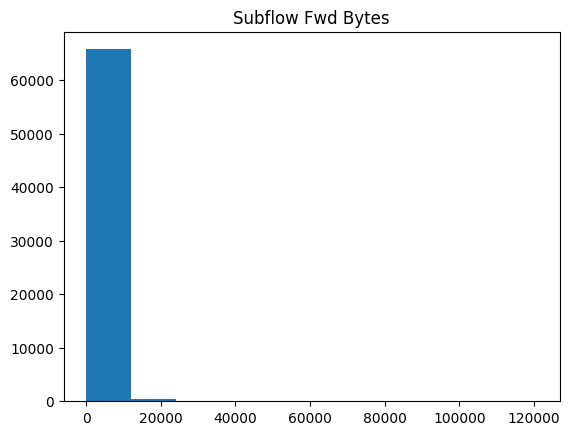

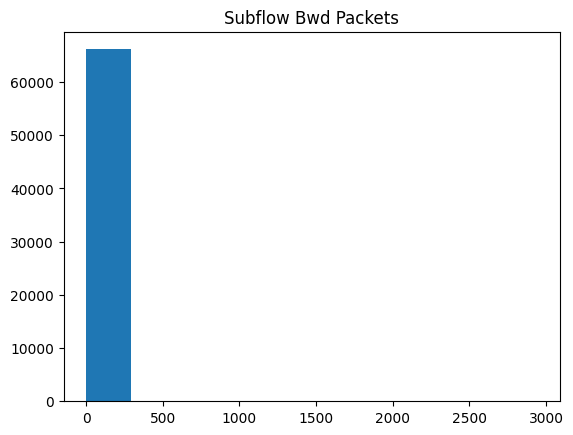

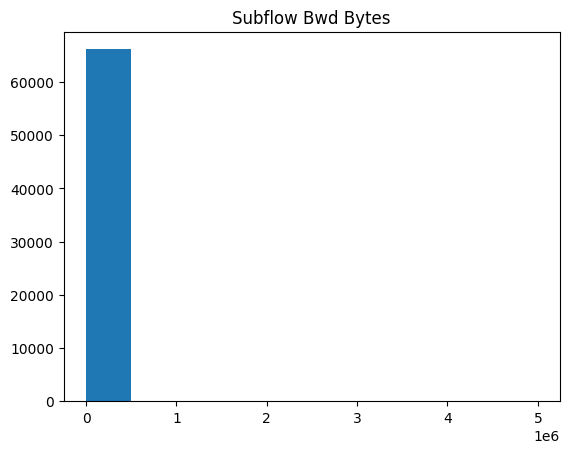

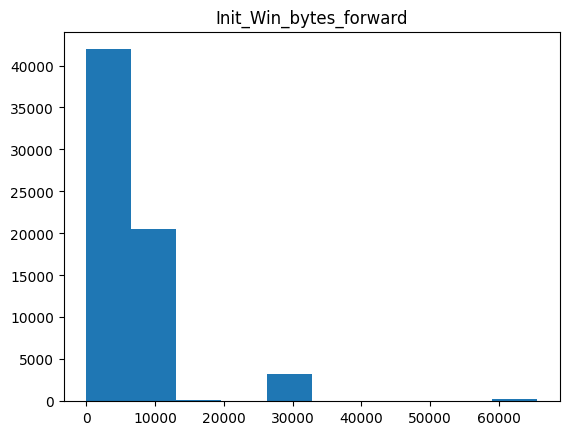

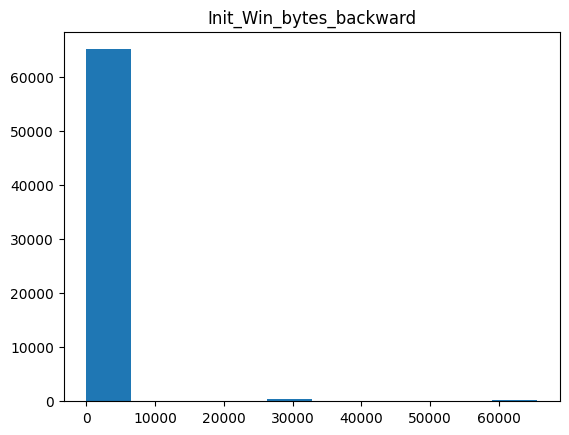

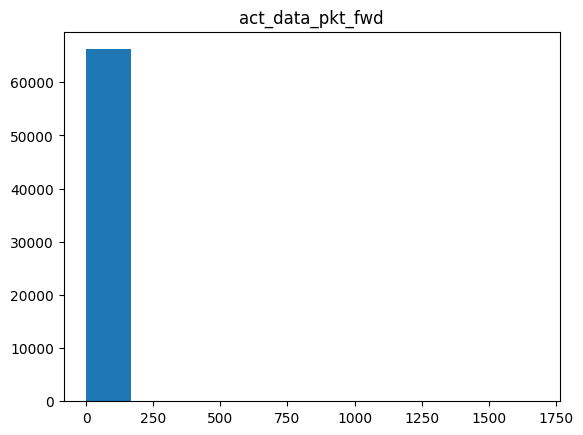

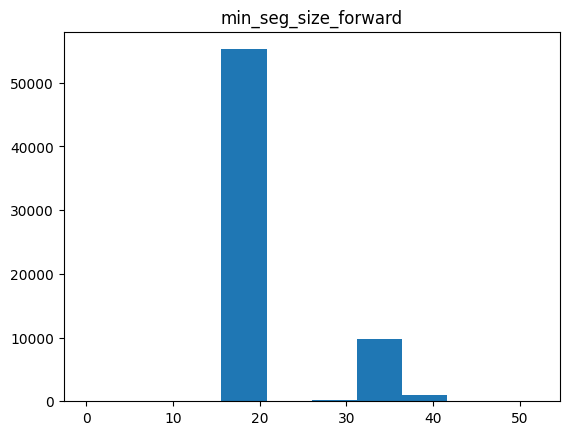

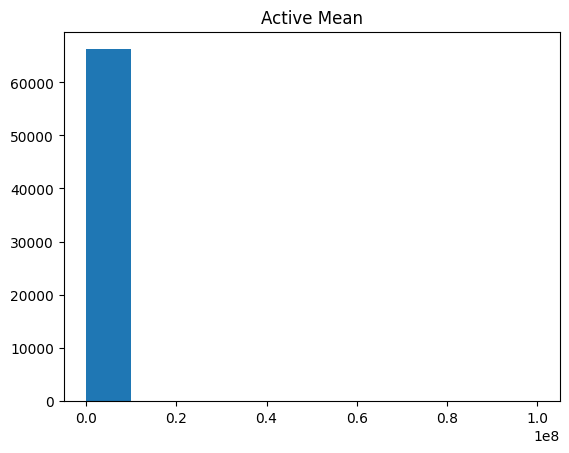

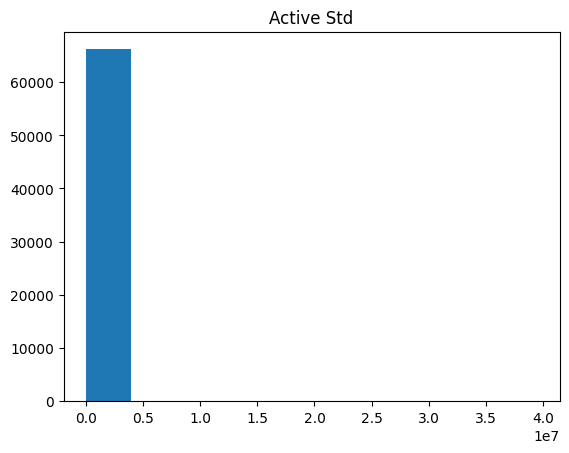

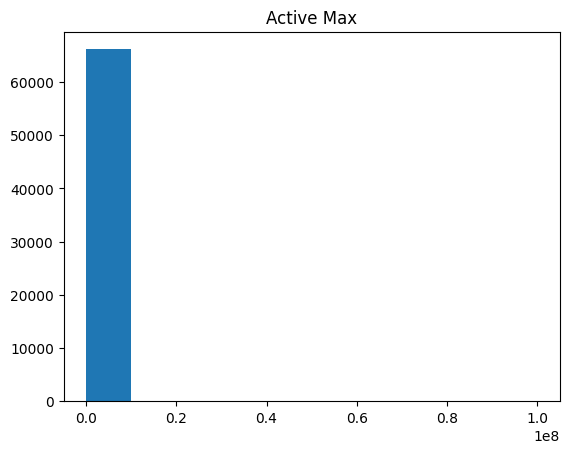

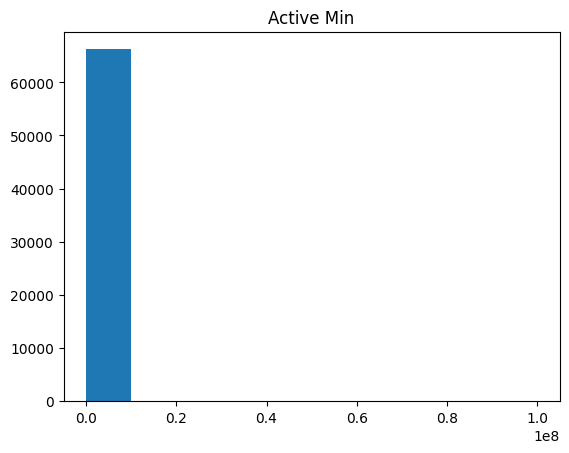

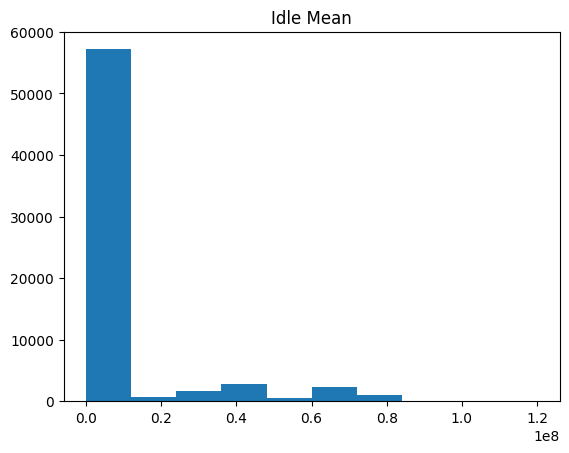

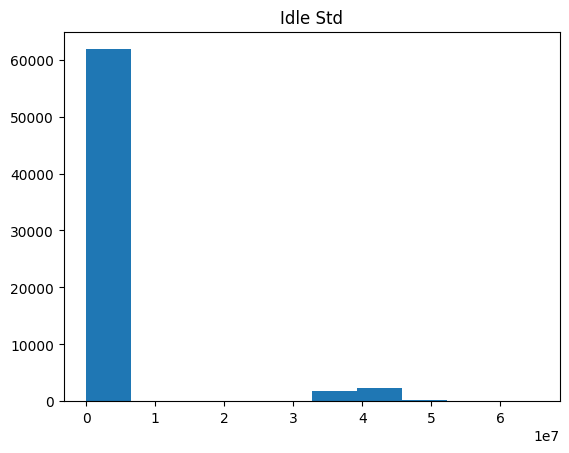

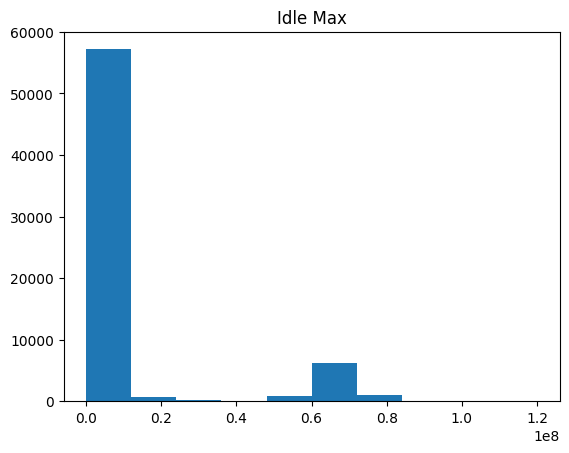

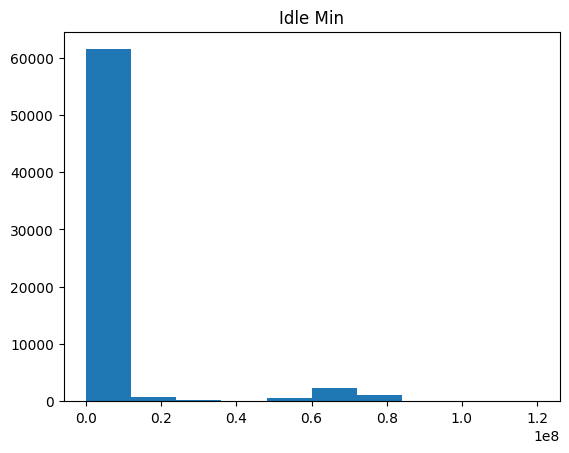

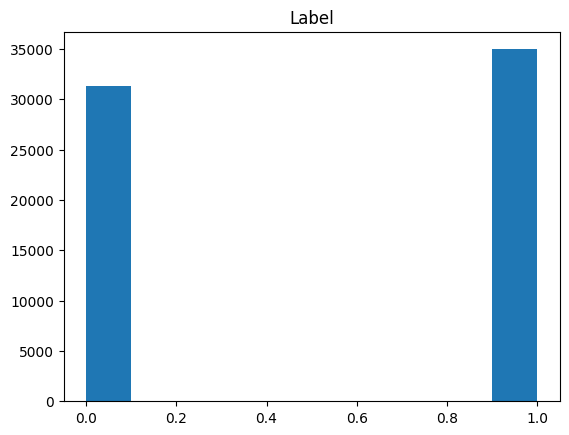

In [28]:
# Créer un histogramme pour chaque caractéristique 
plt.figure(5)
for col in Data_final.columns:
    plt.hist(Data_final[col])
    plt.title(col)
    plt.show()

## Data splitting into train and test

In [29]:
#Séprer les données en caractéristiques et le cairable cible
X = Data_final.drop('Label',axis=1)
Y = Data_final['Label']

#Diviser les données en ensembles d'entraînement et de test
X_train, X_test , Y_train, Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [30]:
print("La taille du jeu de données d'entrainement  = ",X_train.shape)
print("La taille du jeu de données de test  = ",X_test.shape)

La taille du jeu de données d'entrainement  =  (46365, 78)
La taille du jeu de données de test  =  (19871, 78)


## Random Forest

In [31]:
# Random Forest
RfModele= RandomForestClassifier(n_estimators=10, random_state=42)
RfModele.fit(X_train,Y_train)
rf_Pred=RfModele.predict(X_test)
rf_PredTrain=RfModele.predict(X_train)
joblib.dump(RfModele,'modele_detection_cyberattaque.pkl')

['modele_detection_cyberattaque.pkl']

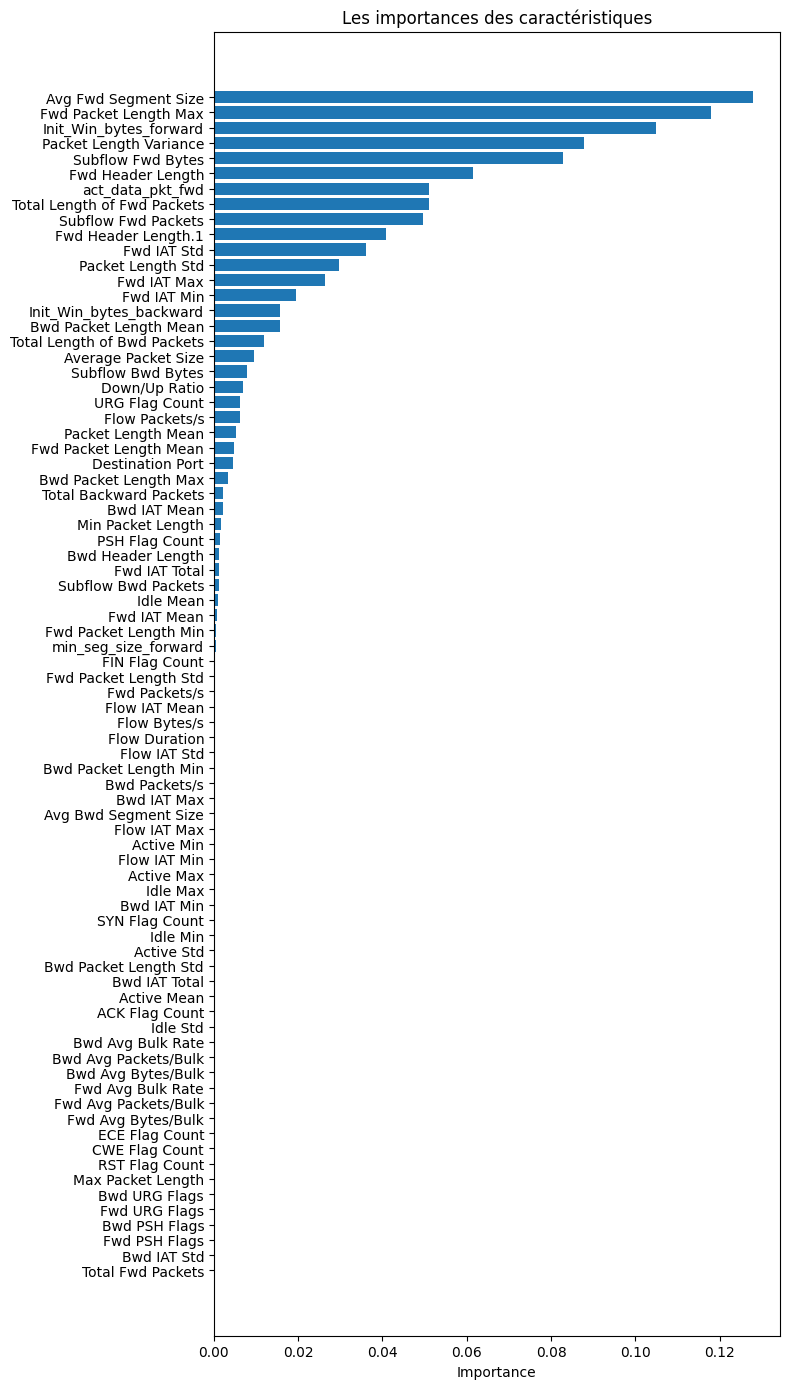

In [33]:
import matplotlib.pyplot as plt

# Obtenir les importances des caractéristiques à partir du modèle entraîné
importances = RfModele.feature_importances_

# Obtenir les indices des caractéristiques triées par importance (de la moins à la plus importante)
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)

# Récupérer les noms réels des colonnes depuis le DataFrame X_train
nomCaracteristique = [X_train.columns[i] for i in indices]

# Tracer les importances des caractéristiques horizontalement
plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), nomCaracteristique)
plt.xlabel("Importance")
plt.title("Les importances des caractéristiques")
plt.tight_layout()
plt.show()


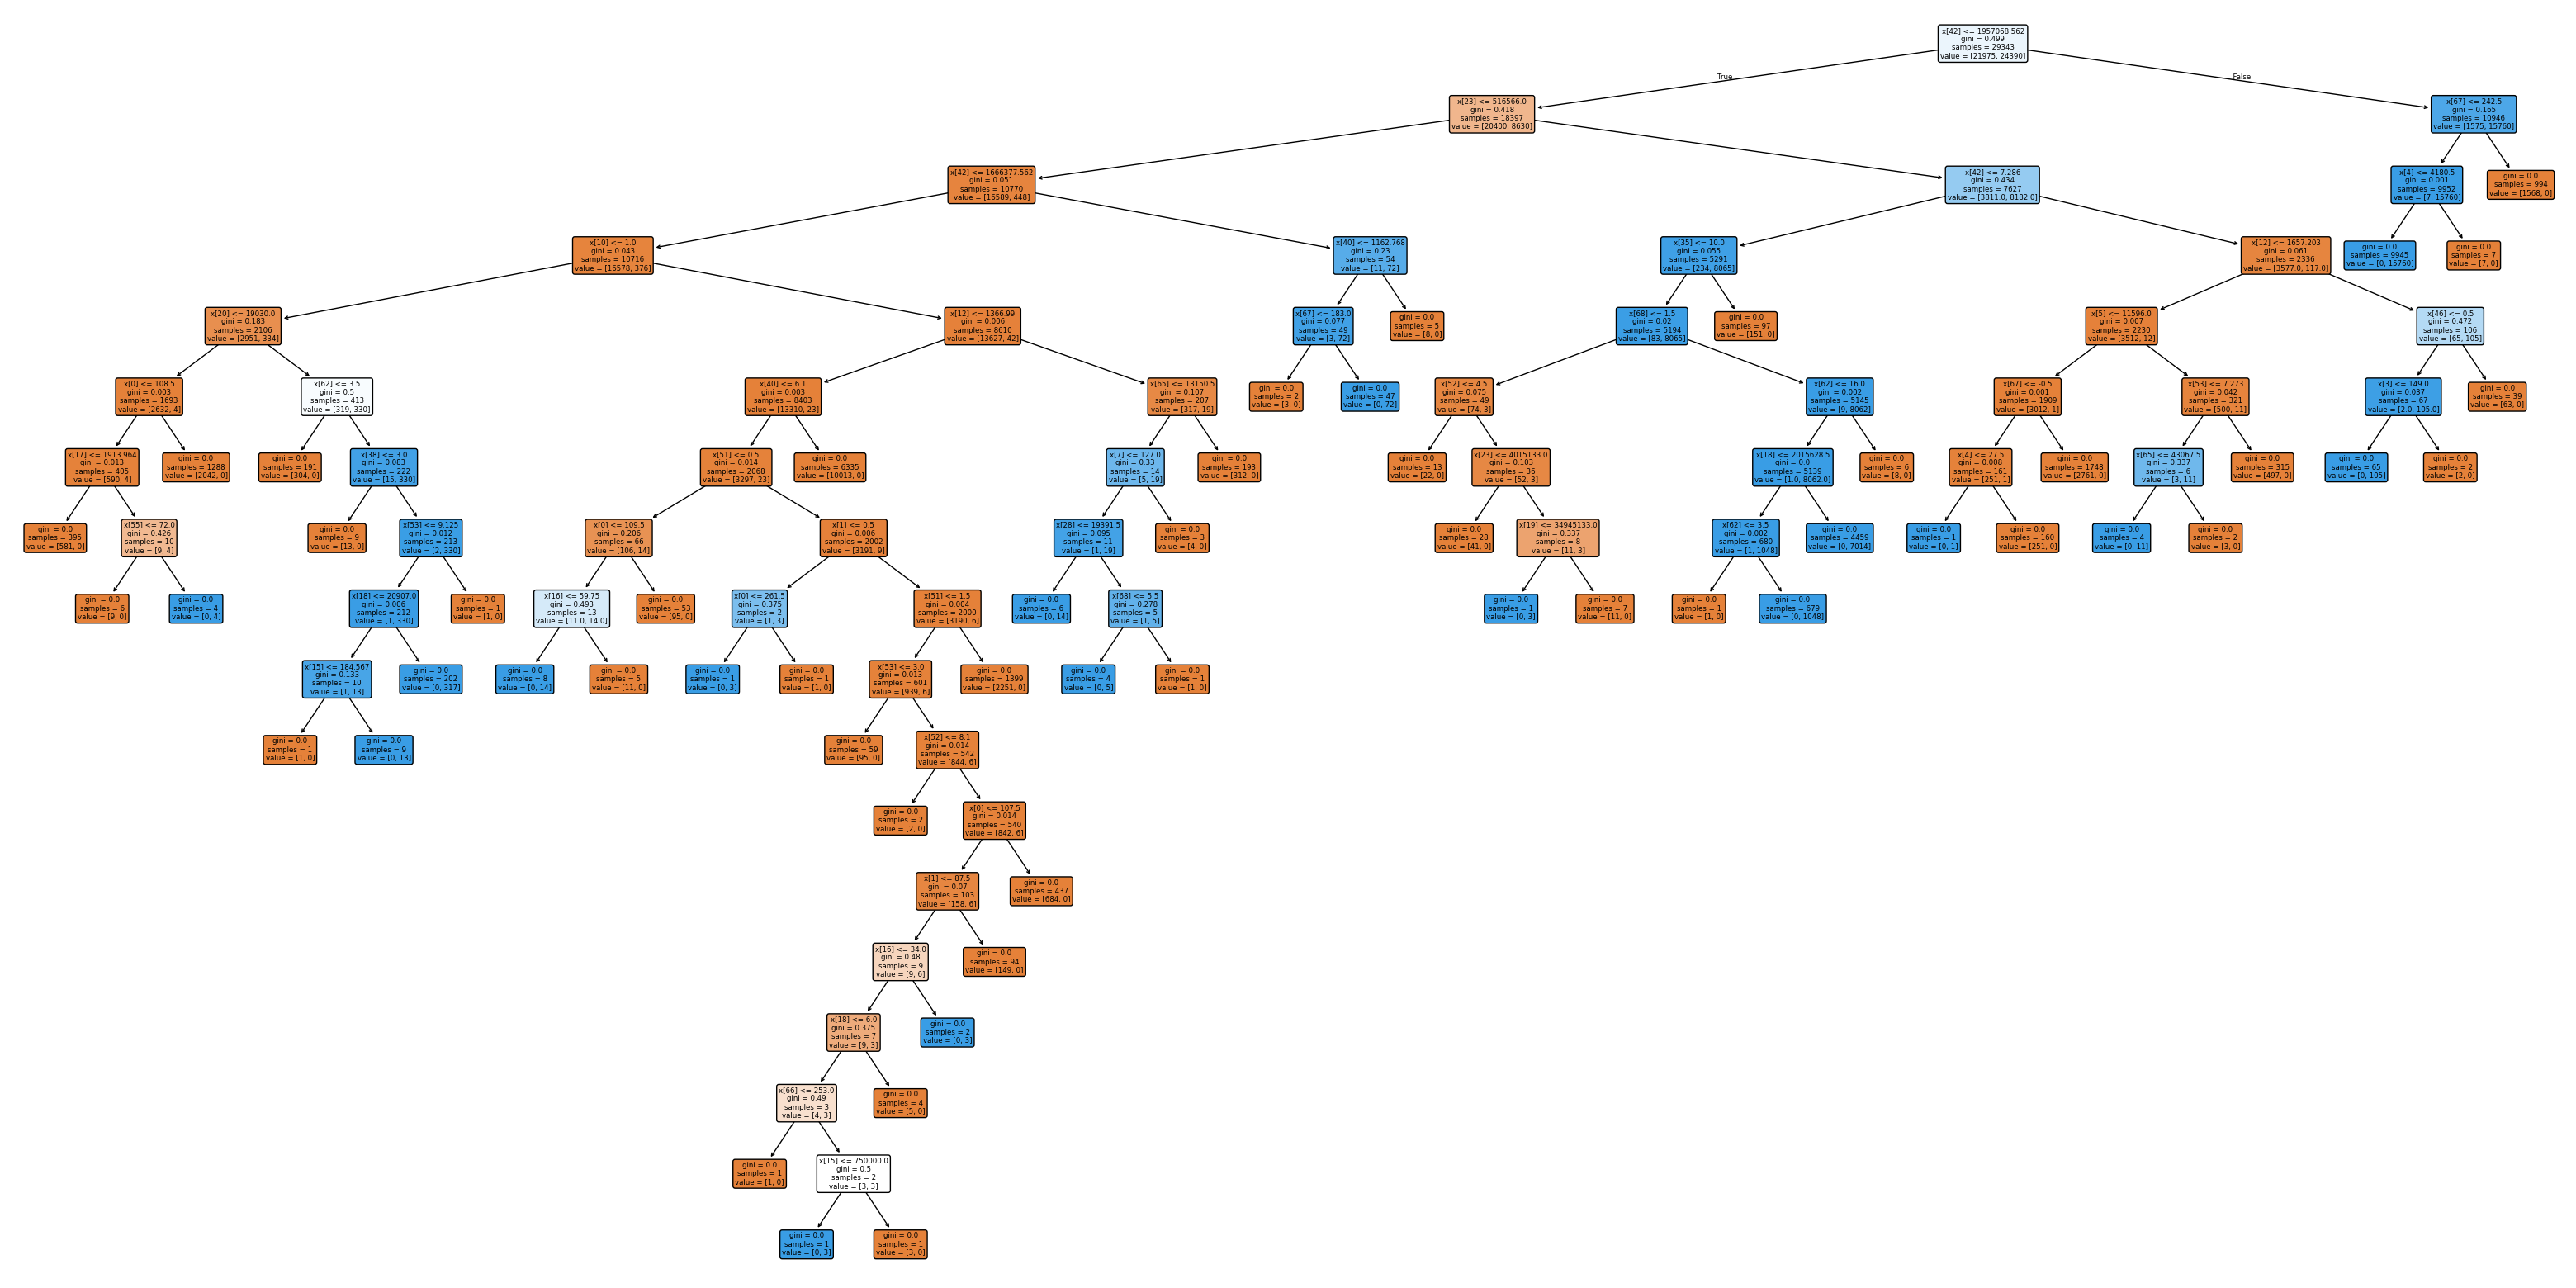

In [24]:
from sklearn.tree import plot_tree

estimator = RfModele.estimators_[0] #Sélectionner le premier estimators du modèle de Random Forest.


plt.figure(figsize=(40,20))
plot_tree(estimator,filled=True, rounded=True)
plt.show()

## Model Evaluation 

In [25]:
# Fonction pour générer et afficher une matrice de confusion détaillée

def afficherMatConfu(Y_reel,Y_pred,classes, title ):
    cm = confusion_matrix(Y_reel,Y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=classes,yticklabels=classes )
    plt.title(title)
    plt.xlabel('Prévu')
    plt.ylabel('réel')
    plt.show()

In [26]:
# Evaluation Random Forest   
rf_accuracy = accuracy_score(Y_test, rf_Pred)  
rf_f1 = f1_score(Y_test,rf_Pred)   
rf_precision = precision_score(Y_test, rf_Pred) 
rf_recall = recall_score(Y_test, rf_Pred)  

print('\n MétriquesRandom Forest :')  
print(f'Accuracy: {rf_accuracy:.4f}')  
print(f'F1 Score: {rf_f1:.4f}')  
print(f'Precision: {rf_precision:.4f}')  
print(f'Recall: {rf_recall:.4f}')   




 MétriquesRandom Forest :
Accuracy: 0.9993
F1 Score: 0.9994
Precision: 1.0000
Recall: 0.9988


In [27]:
rf_train_accuracy = accuracy_score(Y_train, rf_PredTrain)
print(f'Training Accuracy: {rf_train_accuracy:.4f}')
print(f'Test Accuracy: {rf_accuracy:.4f}')
  

Training Accuracy: 1.0000
Test Accuracy: 0.9993


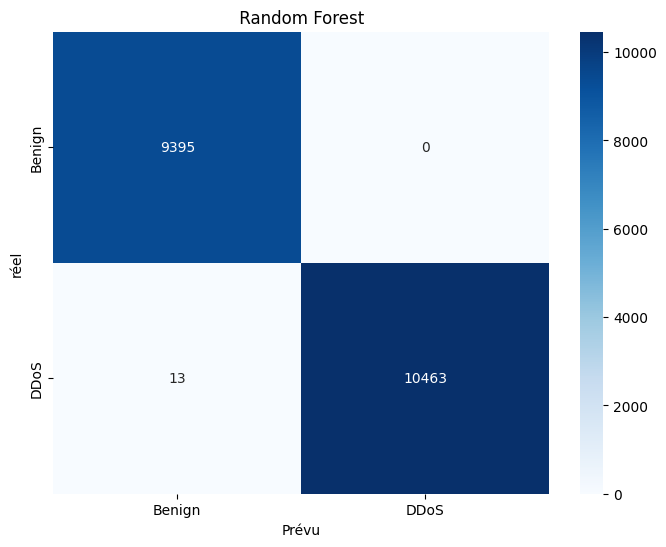

In [28]:
# la matrice de confusion 
afficherMatConfu(Y_test, rf_Pred,['Benign','DDoS'],' Random Forest ')


## Logistic Regression 

In [29]:
LrModele = LogisticRegression(random_state=42)
LrModele.fit(X_train, Y_train)
LrPred = LrModele.predict(X_test)

C:\Users\ttaaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluation du Logistic Regression 

In [30]:
Lr_accuracy=accuracy_score(Y_test,LrPred)
Lr_f1=f1_score(Y_test,LrPred)
Lr_precision = precision_score(Y_test,LrPred)
Lr_recall=recall_score(Y_test,LrPred)

In [31]:
print('\n Métriques LogisticRegression')
print(f'Accuracy : {Lr_accuracy:.4f}')
print(f'F1 score : {Lr_f1:.4f}')
print(f'Precision: {Lr_precision:.4f}')
print(f'Recall: {Lr_recall:.4f}') 


 Métriques LogisticRegression
Accuracy : 0.9434
F1 score : 0.9487
Precision: 0.9086
Recall: 0.9925


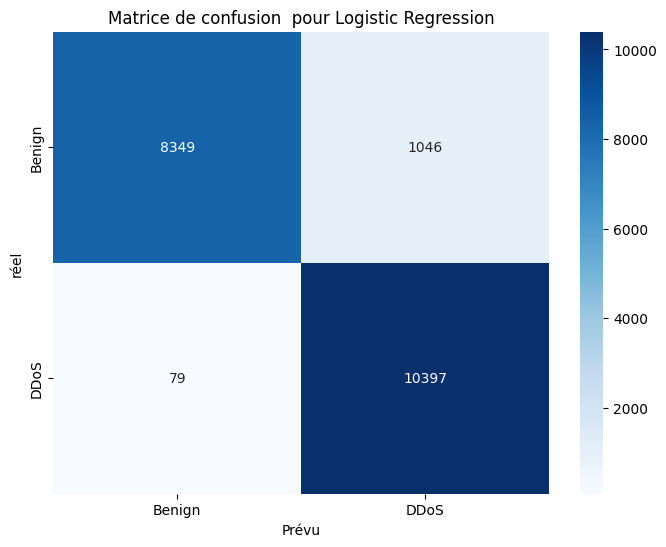

In [32]:
# Matrice de confusion  pour Logistic Regression
afficherMatConfu(Y_test, LrPred,['Benign','DDoS'],'Matrice de confusion  pour Logistic Regression')

## Neural Network

In [33]:
NnModele = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
NnModele.fit(X_train, Y_train)
NnPred = NnModele.predict(X_test)

C:\Users\ttaaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


## Evaluation du Neural NetWork 

In [34]:
Nn_accuracy = accuracy_score(Y_test, NnPred)
Nn_f1 = f1_score(Y_test, NnPred)
Nn_precision = precision_score(Y_test, NnPred)
Nn_recall = recall_score(Y_test, NnPred)

print('\n Métriques Neural Network :')
print(f'Accuracy: {Nn_accuracy:.4f}')
print(f'F1 Score: {Nn_f1:.4f}')
print(f'Precision: {Nn_precision:.4f}')
print(f'Recall: {Nn_recall:.4f}')


 Métriques Neural Network :
Accuracy: 0.9827
F1 Score: 0.9837
Precision: 0.9760
Recall: 0.9915


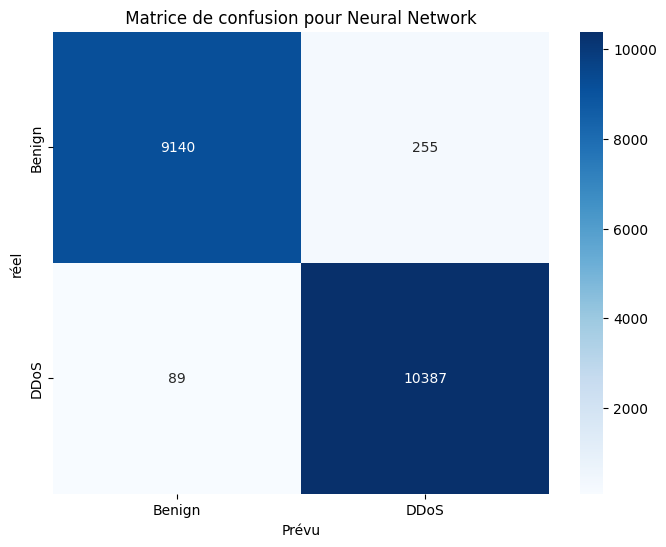

In [35]:
# Matrice de confusion pour Neural Network
afficherMatConfu(Y_test, NnPred, ['Benign', 'DDoS'], ' Matrice de confusion pour Neural Network ')

## La comparison de modèles 